##### Hough Line Transform

In [2]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [37]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,300)

In [38]:
lines.shape

(566, 1, 2)

In [39]:
lines[0:2].shape

(2, 1, 2)

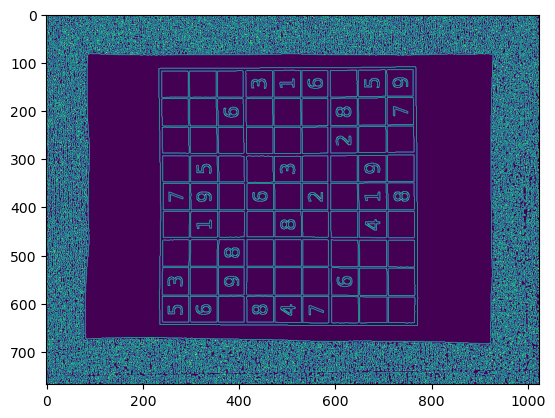

In [40]:
plt.imshow(edges)

In [28]:
for i in range(500):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('houghlines3.jpg',img)

True

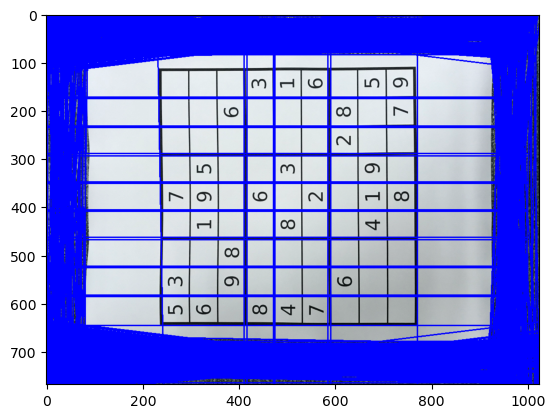

In [29]:
plt.imshow(img)

In [30]:
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

In [31]:
lines.shape

(376, 1, 4)

In [34]:
for i in range(50):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imwrite('houghlines5.jpg',img)



True

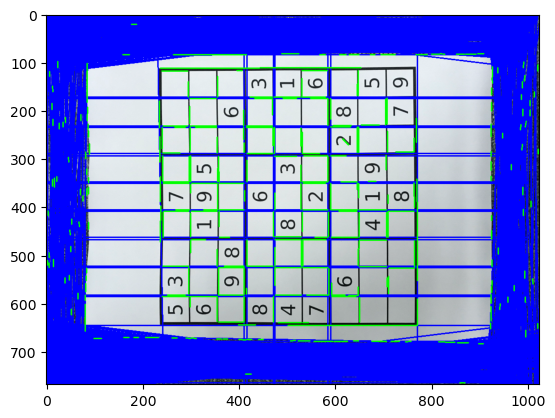

In [35]:
plt.imshow(img)

In [8]:
def nothing(x):
    pass

In [9]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

In [10]:
lines.shape

(376, 1, 4)

In [12]:
minLineLength = 100
maxLineGap = 10
lineNums = 10
# Create a black image, a window
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('minLineLength','image',0,500,nothing)
cv2.createTrackbar('maxLineGap','image',0,500,nothing)
cv2.createTrackbar('lineNums','image',0,100,nothing)
cv2.setTrackbarPos('minLineLength','image',minLineLength)
cv2.setTrackbarPos('maxLineGap','image',maxLineGap)
cv2.setTrackbarPos('lineNums','image',lineNums)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    minLineLength = cv2.getTrackbarPos('minLineLength','image')
    maxLineGap = cv2.getTrackbarPos('maxLineGap','image')
    lineNums = cv2.getTrackbarPos('lineNums','image')
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    lineNum = min(lineNums, lines.shape[0])
    for i in range(lineNum):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

: 